# Лабораторная работа №3: Регрессионный анализ
Выполнила студентка гр. 1384 Усачева Дарья. Вариант №18

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
1. Линейная регрессионная модель

$ Y = X^T \beta + \varepsilon , \quad  \varepsilon $ - вектор ошибок

$ E_\theta \varepsilon = 0 , \quad Var_\theta \varepsilon = \sigma^2 E $

$ E(Y|X) = \beta_0 + \beta_1X $

2. МНК (Метод Наименьших Квадратов)

$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min\beta$

$XX^{\intercal}\beta=XY$ - Нормальные уравнения

$ \widehat \beta = (XX^T)^{-1}XY $ - МНК оценка

$RSS(\beta)=\sum_{i=1}^{n}\left( Y_{i}-\sum_{j=1}^{m}x_{ji}\beta_{j} \right)^{2}$

3. Несмещённая оценка дисперсии $(S^{2})$

$SS_{e}=RSS(\widehat{\beta})$, где r-ранг матрицы X

$s^{2} = \frac{SS_{e}}{n-r} = \frac{RSS(\widehat{\beta})}{n-r}$

4. Доверительный интервал

$\psi = C^T \beta $ - ДНО функция

$\widehat{\psi}=с^{\intercal}\beta$ - МНК-оценка

$ b_\psi = C^T (XX^T)^{-1}C$ - элемент дисперсии оценки

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} $

$ x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} $

$ [\widehat \psi -x_{\alpha}s\sqrt{b} ; \widehat \psi +x_{\alpha}s\sqrt{b}] $ - доверительный интервал уровня доверия $1 -\alpha $ для $\psi$

5. Доверительный эллипс

$ A_\alpha = \{x: (x - \widehat \psi)^T b^{-1}(x - \widehat \psi) \le qs^2x_\alpha\}$, функция параметра $\psi$, где

$ x_\alpha : F_{q, n-r}(x_\alpha) = 1 - \alpha$

$\widehat{\psi}$ - вектор оценок параметров,

$b$ - матрица оценок ковариации,

$s^{2}$ - оценка дисперсии,

q - пороговая точка, связанная с распределением хи-квадрат с (n-r) степенями свободы.


6. Теорема Колмогорова

$D_{n}(\overrightarrow{X}) = \overset{}{\underset{X \in \mathbb R}{sup}} |F_{0}(X_{i}) - F_{n}(X_{i})|$

Если гипотеза $H_{0}$ верна, и $F_{0}(X)$ - непрерывная ф-я на $\mathbb R$, тогда имеет место сходимость

$P(\sqrt{n} D_{n}(\overrightarrow{X}) < z) \xrightarrow[n \rightarrow \infty]{} K(z)$, где

$K(z)=1-\alpha$ - функция распределения Колмогорова.



## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y
 от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


Результаты статистического эксперимента приведены в таблице 1. Требуется оценить характер (случайной) зависимости переменной Y от переменной Х.

Таблица 1:

$ \alpha = 0.01; \quad h = 3.00; $ 

$X = 1, 4, 4, 4, 1, 2, 1, 3, 4, 1, 3, 2, 4, 4, 2, 2, 2, 2, 3, 5, 4, 3, 2, 2, 3, $

$4, 4, 3, 4, 3, 5, 3, 2, 2, 4, 0, 3, 2, 3, 5, 3, 2, 1, 3, 1, 3, 3, 1, 2, 2;$

$Y = 17.19, 8.63, 16.5, 10.89, 7.84, 22.76, 0.53, 11.36, 18.4, 10.24, 1.33, 5.56,$

$9.96, 15.86, 2.88, 20.01, 20.39, 15.63, 13.14, 17.47, 10.96, 15.01, 15.8, 13.56,$

$6.16, 2.2, 9.69, 6.29, 10.76, 8.24, 8.08, 7.68, 4.39, 26.25, 19.35, 3.3, 2.35, 8.29,$

$1.09, 11.03, 13.23, 4.85, 6.88, 5.8, 10.51, 0.46, 10.64, 13.02, 3.33, 1.24;$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
alpha = 0.01
h = 3.00
start_X = np.array([1, 4, 4, 4, 1, 2, 1, 3, 4, 1, 3, 2, 4, 4, 2, 2, 2, 2, 3, 5, 4, 3, 2, 2, 3, 4, 4, 3, 4, 3, 5, 3, 2, 2, 4, 0, 3, 2, 3, 5, 3, 2, 1, 3, 1, 3, 3, 1, 2, 2])
start_Y = np.array([17.19, 8.63, 16.5, 10.89, 7.84, 22.76, 0.53, 11.36, 18.4, 10.24, 1.33, 5.56, 9.96, 15.86, 2.88, 20.01, 20.39, 15.63, 13.14, 17.47, 10.96, 15.01, 15.8, 13.56, 6.16, 2.2, 9.69, 6.29, 10.76, 8.24, 8.08, 7.68, 4.39, 26.25, 19.35, 3.3, 2.35, 8.29, 1.09, 11.03, 13.23, 4.85, 6.88, 5.8, 10.51, 0.46, 10.64, 13.02, 3.33, 1.24])
n = 50

#### Задание 1.
Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить МНК оценки параметром сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

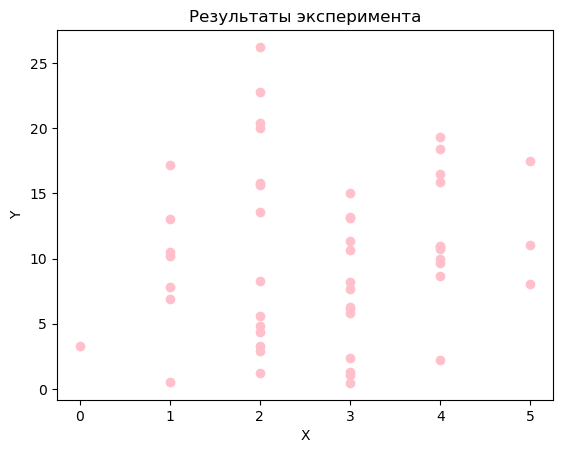

In [3]:
plt.scatter(start_X, start_Y, color='pink')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Результаты эксперимента')
plt.show()

Линейная регрессионная модель:

$ Y = X^T \beta + \varepsilon , \quad  \varepsilon $ - вектор ошибок

$ E_\theta \varepsilon = 0 , \quad Var_\theta \varepsilon = \sigma^2 E $

$ E(Y|X) = \beta_0 + \beta_1X $

МНК оценка:

$ \widehat \beta = (XX^T)^{-1}XY $



[8.54643836 0.58594178]


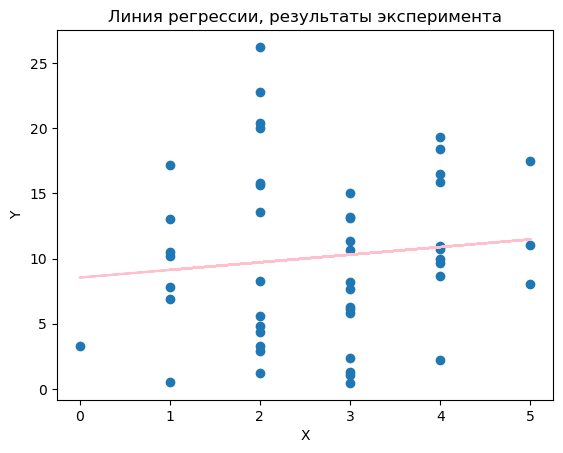

In [4]:
X = np.array([np.ones(n),start_X])
Y = np.array(start_Y)
inv_XX_T = np.linalg.inv(np.dot(X, X.T))
beta = np.dot(np.dot(inv_XX_T, X), Y)
print(beta)

plt.scatter(start_X, start_Y)
model = np.dot(X.T, beta)
plt.plot(start_X, model, color='pink')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Линия регрессии, результаты эксперимента')
plt.show()

#### Задача 2.
Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом $h$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Несмещенная оценка дисперсии $s^{2}$:

$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min\beta$

$SS_{e}=RSS(\widehat{\beta})$, где r-ранг матрицы X

$s^{2} = \frac{SS_{e}}{n-r} = \frac{RSS(\widehat{\beta})}{n-r}$



Несмещенная оценка дисперсии: 39.942847663384704


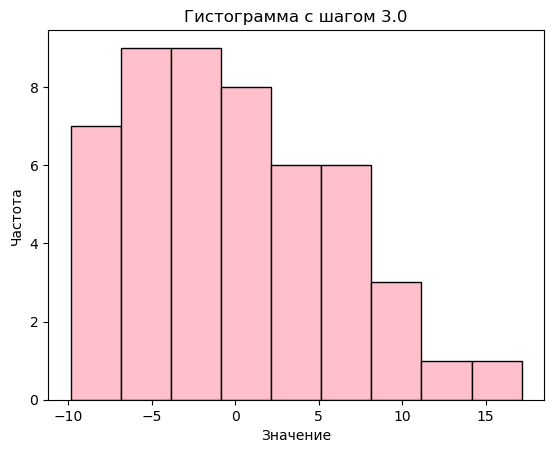

[-9.844263698630122, -6.844263698630122, -3.8442636986301224, -0.8442636986301224, 2.1557363013698776, 5.155736301369878, 8.155736301369878, 11.155736301369878, 14.155736301369878, 17.155736301369878]
[7, 9, 9, 8, 6, 6, 3, 1, 1]


In [5]:

def task2(X, beta, epsilon, s_sq):
    r = X.shape[0]
    SSe = np.dot(epsilon.T, epsilon)
    s_sq = SSe/(n-r)
    print("Несмещенная оценка дисперсии:",s_sq)

    bins = np.arange(min(epsilon), max(epsilon) + h, h)
    count_steps = int((max(epsilon) - min(epsilon) + h) // h)
    freq = []
    steps = [-np.inf, min(epsilon)]
    for j in range(1, count_steps + 2):
        count = 0
        for i in range(n):
            if (epsilon[i] > steps[j - 1] and epsilon[i] <= steps[j] ):
                count += 1
        freq.append(count)
        if j != count_steps + 1 :
            steps.append(steps[j] + h)

    if freq[0] > 0:
        freq[1] += freq[0]
        freq.remove(freq[0])
        steps.remove(steps[0])    
    plt.hist(epsilon, bins=bins, color="pink", edgecolor="black")
    plt.xlabel("Значение")
    plt.ylabel("Частота")
    plt.title("Гистограмма с шагом 3.0")
    plt.show()
    print(steps)
    print(freq)
    return s_sq
s_sq = 0
epsilon = Y - model
s_sq = task2(X, beta, epsilon, s_sq)

Проверка гипотезы нормальности ошибок на уровне значимости $\alpha = 0.01$ по $\chi^2$

$ H_0 : \varepsilon_1, ..., \varepsilon_n \sim \mathcal{N}(0, \sigma^2)$

Объединим интервалы, чтобы в каждом было не менее пяти элментов

$I_1 = (-\infty, -6.8], \; n_1 = 7$

$I_2 = (-6.8, -3.8], \; n_2 = 9$

$I_3 = (-3.8, -0.8], \; n_3 = 9$

$I_{4} = (-0.8, 2.2], \; n_{4} = 8$

$I_{5} = (2.2, 5.2], \; n_{5} = 6$

$I_{6} = (5.2, 8.2], \; n_{6} = 6$

$I_{7} = (8.2, +\infty), \; n_{7} = 5$


In [9]:
def sq_chi(par):
    v = np.array([7, 9, 9, 8, 6, 6, 5])
    I_i = np.array([-6.8, -3.8, -0.8, 2.2, 5.2, 8.2])
    p = [scipy.stats.norm.cdf(I_i[0], 0, par)]
    for i in range(1, len(I_i)):
        p.append( scipy.stats.norm.cdf(I_i[i], 0, par) - sum(p))
    p.append(1 - scipy.stats.norm.cdf(I_i[-1], 0, par))
    p = np.array(p)
    sq_chi = np.sum(((v - n * p) ** 2) / (n * p))
    return sq_chi

result = scipy.optimize.minimize_scalar(sq_chi)
res_sq_chi = result.fun
print("Парметр =", result.x)
print("Статистика хи-квадрат: =", res_sq_chi)
x_alpha = scipy.stats.chi2(5).ppf(1 - alpha)
print("x_alpha =", x_alpha)
if res_sq_chi < x_alpha:
    print("X^2 < x_alpha, принимаем гипотизу H_0")
else:
    print("X^2 > x_alpha, отвергаем гипотизу H_0")
print("Гипотеза может быть принята, если уровень значимости не более:", 1 - scipy.stats.chi2.cdf(res_sq_chi, 7-1-1))


Парметр = 6.47149842599756
Статистика хи-квадрат: = 1.5316678341677878
x_alpha = 15.08627246938899
X^2 < x_alpha, принимаем гипотизу H_0
Гипотеза может быть принята, если уровень значимости не более: 0.9093866768674537


Оценим расстояние полученной оценки до класса нормальных распределений по Колмогорову.

$ \sqrt{n} \cdot max|F_n(y) - F(y)| \sim K $, $K$ - распределение Колмогорова.

Статистика Колмогорова: 0.4005036395506512
x_alpha: 0.2301807385848777
Оценка не соответствует нормальному распределению.
Гипотеза может быть принята, если уровень значимости не более: 4.720480373254787e-08


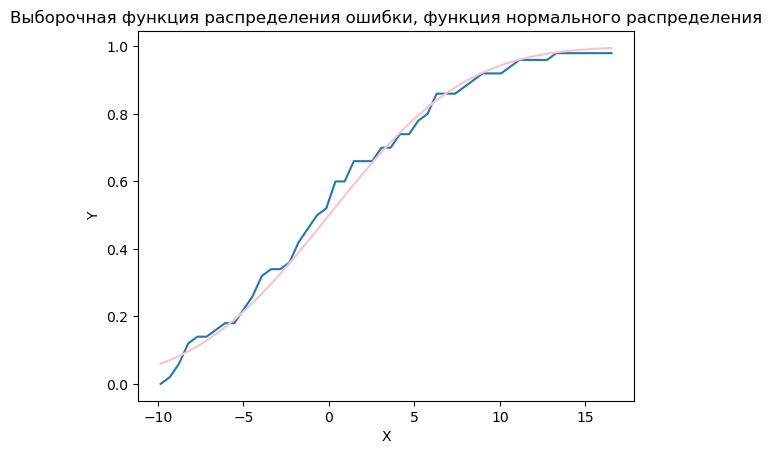

In [11]:

max_delta, _ = scipy.stats.kstest(epsilon, scipy.stats.norm.cdf)
print("Статистика Колмогорова:", max_delta)
x_alpha_0 = scipy.stats.kstwobign.ppf(1 - alpha) / np.sqrt(n)
print("x_alpha:", x_alpha_0)
if max_delta < x_alpha_0:
    print("Оценка соответствует нормальному распределению.")
else:
    print("Оценка не соответствует нормальному распределению.")
print("Гипотеза может быть принята, если уровень значимости не более:", 1 - scipy.stats.ksone(n).cdf(max_delta))
x = np.linspace(min(epsilon), max(epsilon), 50)
y = np.zeros(len(x))
for i in range(len(x)):
    for j in sorted(epsilon):
        if j < x[i]:
            y[i] += 1
    y[i] = y[i] /n
plt.plot(x, y)
plt.plot(x, scipy.stats.norm.cdf(x, 0, np.sqrt(s_sq)),color='pink') 
plt.title('Выборочная функция распределения ошибки, функция нормального распределения')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Задание 3.
В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия 1 − $\alpha$. Построить доверительный эллипс уровня доверия 1 − $\alpha$ для $(\beta_0, \beta_1)$. (вычислить его полуоси)

$\psi = C^T \beta $ - ДНО функция

$\widehat{\psi}=с^{\intercal}\beta$ - МНК-оценка

$ b_\psi = C^T (XX^T)^{-1}C$ - элемент дисперсии оценки

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} $

$ x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} $

$ [\widehat \psi -x_{\alpha}s\sqrt{b} ; \widehat \psi +x_{\alpha}s\sqrt{b}] $ - доверительный интервал уровня доверия $1 -\alpha $ для $\psi$

Для $\beta_0:$

$ C = \begin{pmatrix}
    1 \\
    0
\end{pmatrix} $

Для $\beta_1:$

$ C = \begin{pmatrix}
    0 \\
    1
\end{pmatrix} $


In [51]:
x_a = scipy.stats.t.ppf(1 - alpha/2, df = n - 2)
C_0 = np.array([1, 0])
b_0 = np.dot(np.dot(C_0.T, inv_XX_T), C_0)
C_1 = np.array([0, 1])
b_1 = np.dot(np.dot(C_1.T, inv_XX_T), C_1)

print("Доверительный интервал уровня доверия", 1 - alpha, "для betta_0 :")
print([beta[0] - x_a * np.sqrt(s_sq) * np.sqrt(b_0), beta[0] + x_a * np.sqrt(s_sq) * np.sqrt(b_0)])

print("Доверительный интервал уровня доверия", 1 - alpha, "для betta_1 :")
print([ beta[1] - x_a * np.sqrt(s_sq) * np.sqrt(b_1), beta[1] + x_a * np.sqrt(s_sq) * np.sqrt(b_1)])

Доверительный интервал уровня доверия 0.99 для betta_0 :
[2.5394662994397557, 14.55341041288899]
Доверительный интервал уровня доверия 0.99 для betta_1 :
[-1.4390080864102206, 2.6108916480540545]


Доверительный эллипс уровня доверия $1 - \alpha$

$ A_\alpha = \{x: (x - \widehat \psi)^T b^{-1}(x - \widehat \psi) \le qs^2x_\alpha\}$, функция параметра $\psi$, где

$ x_\alpha : F_{q, n-r}(x_\alpha) = 1 - \alpha$

$C = \begin{pmatrix}
    1 & 0\\
    0 & 1
\end{pmatrix} $

$\cfrac{\lambda_1}{qs^2x_\alpha}x^2 + \cfrac{\lambda_2}{qs^2x_\alpha}y^2 \le 1$, 

где $\lambda_1$ и $\lambda_2$ - собственные числа матрицы $XX^T$, $ q = dim(\psi)$, а $\begin{pmatrix}
    x\\
    y
\end{pmatrix}  = P(\widehat \psi - \psi)$

(P - матрица ортогонального преобразования.)

x_alpha = 5.07666380708612
Большая полуось:  55.872476601711995
Малая полуось:  0.8401035646592604
Матрица ортогонального преобразования:
 [[-0.95399653 -0.29981765]
 [ 0.29981765 -0.95399653]]
Собственные числа матрицы XX^T:
 [  7.25854379 482.74145621]


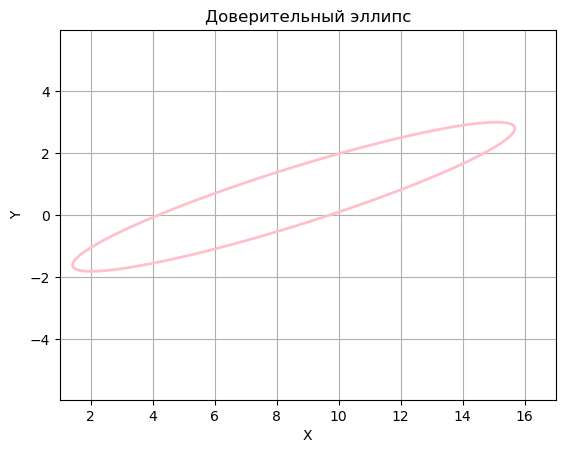

In [16]:
q = 2
r = np.linalg.matrix_rank(X)
lambda_k, P = np.linalg.eig(np.dot(X,X.T))
x_alpha = scipy.stats.f(q, n - 2).ppf(1 - alpha)
print("x_alpha =", x_alpha)
a = lambda_k[0] / (q * s_sq * x_alpha)
b = lambda_k[1] / (q * s_sq * x_alpha)
print("Большая полуось: ", q * s_sq * x_alpha / lambda_k[0])
print("Малая полуось: ", q * s_sq * x_alpha / lambda_k[1])
print("Матрица ортогонального преобразования:\n", P)
print("Собственные числа матрицы XX^T:\n", lambda_k)
def ellipse(x_y):
    x = x_y[0]
    y = x_y[1]
    return x**2 * a + y**2 * b

def find_x_y(beta_0, beta_1):
    return [(-0.95399653 * (8.54643836 - beta_0)) + (-0.29981765 * (0.58594178 - beta_1)), 
            (0.29981765 * (8.54643836 - beta_0)) + (-0.95399653 * (0.58594178 - beta_1))]

x, y = np.meshgrid(np.linspace(1, 17, 150), np.linspace(-3, 3, 150))
ellipse = ellipse(find_x_y(x, y))
contour1 = plt.contour(x, y, ellipse, levels=[1], colors='pink', linewidths=2)
plt.grid(True)
plt.title('Доверительный эллипс')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

#### Задание 4.
Сформулировать гипотезу независимости переменной Y от переменной X. Провести проверку значимости.

$\psi = C^T \beta $

$ H_0 : \beta_1 = 0$

$\mathcal{F} = \cfrac{\widehat \psi^T ((C^T (XX^T)^{-1}C)^{-1}) \widehat \psi}{qs^2} \sim F_{q, n-r}$

$x_\alpha: F_{q, n-r}(x_\alpha) = 1 - \alpha $

$ C = \begin{pmatrix}
    0 \\
    1
\end{pmatrix} $

$\mathcal{F} = \cfrac{{\widehat \beta_1} ^2}{bqs^2} $


In [89]:
q = 1
r = 2 
x_alpha = scipy.stats.f(q, n - r).ppf(1 - alpha)
print("x_alpha =", x_alpha)
C_1 = np.array([0, 1])
b_1 = np.dot(np.dot(C_1.T, inv_XX_T), C_1)
print("b =",b_1)
F = beta[1]**2 / (b_1 * q * s_sq)
print("F =", F)
if F < x_alpha:
    print("F < x_alpha, принимаем гипотизу H_0")
else:
    print("F > x_alpha, отвергаем гипотизу H_0")
print("Гипотеза может быть принята, если уровень значимости не более:", 1 - scipy.stats.f.cdf(F, q, n - r))

x_alpha = 7.194218442187959
b = 0.01426940639269407
F = 0.602370926587444
F < x_alpha, принимаем гипотизу H_0
Гипотеза может быть принята, если уровень значимости не более: 0.4414824539007015


#### Задание 5
Сформулировать модель, включающую дополнительный член $X^2$. Построить МНК оценки параметров $\beta_0, \beta_1, \beta_2$ в данной модели. Изобразить полученную регрессионную зависимость.

Линейная регрессионная модель:

$ Y = X^T \beta + \varepsilon , \quad  \varepsilon $ - вектор ошибок

$ E_\theta \varepsilon = 0 , \quad Var_\theta \varepsilon = \sigma^2 E $

$ E(Y|X) = \beta_0 + \beta_1X + \beta_2X^2 $

МНК оценка:

$ \widehat \beta = (XX^T)^{-1}XY $



[9.12014925 0.06136816 0.09694652]


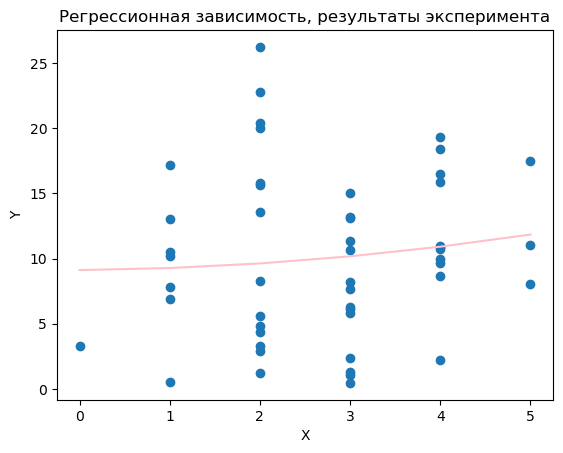

In [17]:
X1 = np.array([np.ones(n),start_X,start_X **2])
Y = np.array(start_Y)
inv_X1X1_T = np.linalg.inv(np.dot(X1, X1.T))
beta1 = np.dot(np.dot(inv_X1X1_T, X1), Y)
print(beta1)

plt.scatter(start_X, start_Y)
model1 = np.dot(X1.T, beta1)
plt.plot(np.sort(start_X), np.dot(np.sort(X1).T, beta1), color='pink')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Регрессионная зависимость, результаты эксперимента')
plt.show()

#### Задание 6
Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

Несмещенная оценка дисперсии $s^{2}$:

$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min\beta$

$SS_{e}=RSS(\widehat{\beta})$, где r-ранг матрицы X

$s^{2} = \frac{SS_{e}}{n-r} = \frac{RSS(\widehat{\beta})}{n-r}$



Несмещенная оценка дисперсии: 40.76626646951413


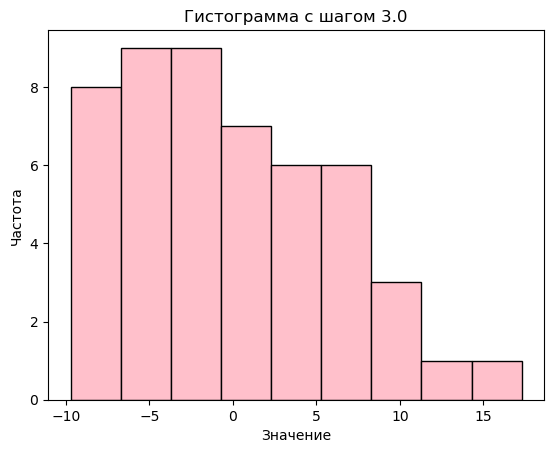

[-9.716772388059715, -6.716772388059715, -3.7167723880597148, -0.7167723880597148, 2.2832276119402852, 5.283227611940285, 8.283227611940285, 11.283227611940285, 14.283227611940285, 17.283227611940283]
[8, 9, 9, 7, 6, 6, 3, 1, 1]


In [23]:
s_sq1 = 0
epsilon1 = Y - model1
s_sq1 = task2(X1, beta1, epsilon1, s_sq1)


Проверка гипотезы нормальности ошибок на уровне значимости $\alpha = 0.01$ по $\chi^2$

$ H_0 : \varepsilon_1, ..., \varepsilon_n \sim \mathcal{N}(0, \sigma^2)$

Объединим интервалы, чтобы в каждом было не менее пяти элментов

$I_1 = (-\infty, -6.7], \; n_1 = 8$

$I_2 = (-6.7, -3.7], \; n_2 = 9$

$I_3 = (-3.7, -0.7], \; n_3 = 9$

$I_{4} = (-0.7, 2.3], \; n_{4} = 7$

$I_{5} = (2.3, 5.3], \; n_{5} = 6$

$I_{6} = (5.3, 8.3], \; n_{6} = 6$

$I_{7} = (8.3, +\infty), \; n_{7} = 5$


In [24]:
def sq_chi1(par):
    v = np.array([8, 9, 9, 7, 6, 6, 5])
    I_i = np.array([-6.7, -3.7, -0.7, 2.3, 5.3, 8.3])
    p = [scipy.stats.norm.cdf(I_i[0], 0, par)]
    for i in range(1, len(I_i)):
        p.append( scipy.stats.norm.cdf(I_i[i], 0, par) - sum(p))
    p.append(1 - scipy.stats.norm.cdf(I_i[-1], 0, par))
    p = np.array(p)
    sq_chi = np.sum(((v - n * p) ** 2) / (n * p))
    return sq_chi

result1 = scipy.optimize.minimize_scalar(sq_chi1)
res_sq_chi1 = result1.fun
print("Парметр =", result1.x)
print("Статистика хи-квадрат: =", res_sq_chi1)
x_alpha = scipy.stats.chi2(5).ppf(1 - alpha)
print("x_alpha =", x_alpha)
if res_sq_chi1 < x_alpha:
    print("X^2 < x_alpha, принимаем гипотизу H_0")
else:
    print("X^2 > x_alpha, отвергаем гипотизу H_0")
print("Гипотеза может быть принята, если уровень значимости не более:", 1 - scipy.stats.chi2.cdf(res_sq_chi1, 7-1-1))


Парметр = 6.714535814382335
Статистика хи-квадрат: = 1.726101455764642
x_alpha = 15.08627246938899
X^2 < x_alpha, принимаем гипотизу H_0
Гипотеза может быть принята, если уровень значимости не более: 0.8855951505372489


C:\Users\79064\AppData\Local\Temp\ipykernel_24312\1104587198.py:9: RuntimeWarning: divide by zero encountered in true_divide
  sq_chi = np.sum(((v - n * p) ** 2) / (n * p))


Оценим расстояние полученной оценки до класса нормальных распределений по Колмогорову.

$ \sqrt{n} \cdot max|F_n(y) - F(y)| \sim K $, $K$ - распределение Колмогорова.

Статистика Колмогорова: 0.3936134137039329
x_alpha: 0.2301807385848777
Оценка не соответствует нормальному распределению.
Гипотеза может быть принята, если уровень значимости не более: 8.545771390533474e-08


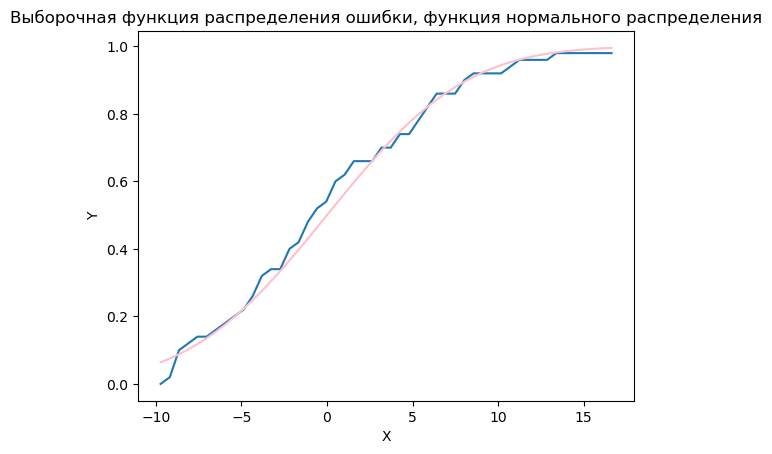

In [25]:

max_delta, _ = scipy.stats.kstest(epsilon1, scipy.stats.norm.cdf)
print("Статистика Колмогорова:", max_delta)
x_alpha_1 = scipy.stats.kstwobign.ppf(1 - alpha) / np.sqrt(n)
print("x_alpha:", x_alpha_1)
if max_delta < x_alpha_1:
    print("Оценка соответствует нормальному распределению.")
else:
    print("Оценка не соответствует нормальному распределению.")
print("Гипотеза может быть принята, если уровень значимости не более:", 1 - scipy.stats.ksone(n).cdf(max_delta))
x1 = np.linspace(min(epsilon1), max(epsilon1), 50)
y1 = np.zeros(len(x1))
for i in range(len(x1)):
    for j in sorted(epsilon1):
        if j < x1[i]:
            y1[i] += 1
    y1[i] = y1[i] /n
plt.plot(x1, y1)
plt.plot(x1, scipy.stats.norm.cdf(x1, 0, np.sqrt(s_sq1)),color='pink') 
plt.title('Выборочная функция распределения ошибки, функция нормального распределения')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Задание 7
В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$, $\beta_1$, $\beta_2$  уровня доверия 1 − $\alpha$. Написать уравнение доверительного эллипсоида уровня доверия 1 − $\alpha$.


$\psi = C^T \beta $ - ДНО функция

$ b_\psi = C^T (XX^T)^{-1}C$ - элемент дисперсии оценки

$ \cfrac{\widehat \psi - \psi}{s\sqrt{b}} \sim S_{n-r} $

$ x_\alpha : S_{n-r}(x_\alpha) = 1 -\frac{\alpha}{2} $

$ [\widehat \psi -x_{\alpha}s\sqrt{b} ; \widehat \psi +x_{\alpha}s\sqrt{b}] $ - доверительный интервал уровня доверия $1 -\alpha $ для $\psi$

Для $\beta_0:$

$ C = \begin{pmatrix}
    1 \\
    0 \\
    0
\end{pmatrix} $

Для $\beta_1:$

$ C = \begin{pmatrix}
    0 \\
    1 \\
    0
\end{pmatrix} $

Для $\beta_2:$

$ C = \begin{pmatrix}
    0 \\
    0 \\
    1
\end{pmatrix} $


In [93]:
x_a1 = scipy.stats.t(n - 3).ppf(1 - alpha/2)
C1_0 = np.array([1, 0, 0])
b1_0 = np.dot(np.dot(C1_0.T, inv_X1X1_T), C1_0)
C1_1 = np.array([0, 1, 0])
b1_1 = np.dot(np.dot(C1_1.T, inv_X1X1_T), C1_1)
C1_2 = np.array([0, 0, 1])
b1_2 = np.dot(np.dot(C1_2.T, inv_X1X1_T), C1_2)

print("Доверительный интервал уровня доверия", 1 - alpha, "для betta_0 :")
print([beta1[0] - x_a1 * np.sqrt(s_sq1) * np.sqrt(b1_0), beta1[0] + x_a1 * np.sqrt(s_sq1) * np.sqrt(b1_0)])

print("Доверительный интервал уровня доверия", 1 - alpha, "для betta_1 :")
print([ beta1[1] - x_a1 * np.sqrt(s_sq1) * np.sqrt(b1_1), beta1[1] + x_a1 * np.sqrt(s_sq1) * np.sqrt(b1_1)])

print("Доверительный интервал уровня доверия", 1 - alpha, "для betta_2 :")
print([ beta1[2] - x_a1 * np.sqrt(s_sq1) * np.sqrt(b1_2), beta1[2] + x_a1 * np.sqrt(s_sq1) * np.sqrt(b1_2)])

Доверительный интервал уровня доверия 0.99 для betta_0 :
[-1.5915821718417469, 19.831880679304142]
Доверительный интервал уровня доверия 0.99 для betta_1 :
[-8.26191996190627, 8.384656280314344]
Доверительный интервал уровня доверия 0.99 для betta_2 :
[-1.3940123356144494, 1.5879053704403183]


Доверительный эллипсоид уровня доверия 1 - $\alpha$

$ A_\alpha = \{x: (x - \widehat \psi)^T b^{-1}(x - \widehat \psi) \le qs^2x_\alpha\}$, функция параметра $\psi$, где

$ x_\alpha : F_{q, n-r}(x_\alpha) = 1 - \alpha$

$C = \begin{pmatrix}
    1 & 0 & 0\\
    0 & 1 & 0\\
    0 & 0 & 1
\end{pmatrix} $

$\cfrac{\lambda_1}{qs^2x_\alpha}x^2 + \cfrac{\lambda_2}{qs^2x_\alpha}y^2 + \cfrac{\lambda_3}{qs^2x_\alpha}z^2 \le 1$ , 

где $\lambda_1$, $\lambda_2$ и $\lambda_3$ - собственные числа матрицы $XX^T$, $ q = dim(\psi)$, а $ \begin{pmatrix}
    x\\
    y\\
    z
\end{pmatrix}  = P(\widehat \psi - \psi)$ (P - матрица ортогонального преобразования.)

In [26]:
from mpl_toolkits.mplot3d import Axes3D
q = 3
r = np.linalg.matrix_rank(X1)
lambda_k, P = np.linalg.eig(np.dot(X1,X1.T))
x_alpha = scipy.stats.f(q, n - r).ppf(1 - alpha)
print("x_alpha =", x_alpha)
a = lambda_k[0] / (q * s_sq1 * x_alpha)
b = lambda_k[1] / (q * s_sq1 * x_alpha)
c = lambda_k[2] / (q * s_sq1 * x_alpha)
print("a, b, c =", a, b, c)
print("Матрица ортогонального преобразования:\n", P)
print("Собственные числа матрицы XX^T:\n", lambda_k)

x_alpha = 4.227900552121905
a, b, c = 12.572549674745805 0.003166434490884351 0.08414799906021879
Матрица ортогонального преобразования:
 [[-0.07114264 -0.79090143 -0.60779409]
 [-0.25251783  0.60376929 -0.75610673]
 [-0.9649733  -0.09968741  0.24267045]]
Собственные числа матрицы XX^T:
 [6.50085257e+03 1.63725929e+00 4.35101670e+01]


$ \begin{pmatrix} x\\ y\\ z \end{pmatrix} = \begin{pmatrix}
-1.34521046 +  0.07114264 \cdot \beta_0 + 0.79090143 \cdot \beta_1 + 0.60779409 \cdot \beta_2 \\
-4.97170774 + 0.25251783 \cdot \beta_0 - 0.60376929 \cdot \beta_1 + 0.75610673 \cdot \beta_2 \\
-17.54327828 + 0.9649733 \cdot \beta_0 +  0.09968741 \cdot \beta_1 - 0.24267045 \cdot \beta_2
\end{pmatrix}$

Уравнение эллипса:

$12.572549674745805 \cdot x^2 + 0.003166434490884351\cdot y^2 + 0.08414799906021879\cdot z^2 \le 1 $

$12.572549674745805 \cdot (-1.34521046 +  0.07114264 \cdot \beta_0 + 0.79090143 \cdot \beta_1 + 0.60779409 \cdot \beta_2)^2 + 0.003166434490884351\cdot (-4.97170774 + 0.25251783 \cdot \beta_0 - 0.60376929 \cdot \beta_1 + 0.75610673 \cdot \beta_2)^2 + 0.08414799906021879\cdot (-17.54327828 + 0.9649733 \cdot \beta_0 +  0.09968741 \cdot \beta_1 - 0.24267045 \cdot \beta_2)^2 \le 1$

#### Задание 8.
Сформулировать гипотезу линейной регрессинной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.

$\psi = C^T \beta $

$ H_0 : \beta_2 = 0$

$\mathcal{F} = \cfrac{\widehat \psi^T ((C^T (XX^T)^{-1}C)^{-1}) \widehat \psi}{qs^2} \sim F_{q, n-r}$

$x_\alpha: F_{q, n-r}(x_\alpha) = 1 - \alpha $

$ C = \begin{pmatrix}
    0 \\
    0 \\
    1
\end{pmatrix} $

$\mathcal{F} = \cfrac{{\widehat \beta_2} ^2}{bqs^2} $

In [92]:
q = 1
r = 3
x_alpha = scipy.stats.f(q, n - r).ppf(1 - alpha)
print("x_alpha =", x_alpha)
C_2 = np.array([0, 0, 1])
b_2 = np.dot(np.dot(C_2.T, inv_X1X1_T), C_2)
print("b =",b_2)
F = beta1[1]**2 / (b_2 * q * s_sq1)
print("F =", F)
if F < x_alpha:
    print("F < x_alpha, принимаем гипотизу H_0")
else:
    print("F > x_alpha, отвергаем гипотизу H_0")
print("Гипотеза может быть принята, если уровень значимости не более:", 1 - scipy.stats.f.cdf(F, q, n - r))

x_alpha = 7.2068388654187014
b = 0.007566334991708134
F = 0.012209550867336839
F < x_alpha, принимаем гипотизу H_0
Гипотеза может быть принята, если уровень значимости не более: 0.9124858532191915


## Выводы

В ходе данной лабораторной работы были изучены :
- основные теоретические положения линейной регрессии;
- метод наименьших квадратов (МНК)(является стандартным методом для оценки параметров в линейной регрессии);
- постороение несмещенной оценки дисперсии;
- построение доверительных интерваалов и эллипсов;
- проверка гипотез в регрессионном анализе, критерий $\chi^2$ для проверки гипотез.

Также было освоено построение регрессионной модели, проведена проверка значимости параметров. Кроме того, оценено расстояние до нормального распределения с использованием критерия Колмогорова.

В результате работы были получены данные, которые позволяют сделать статистические выводы о параметрах модели и их значимости.
